In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats#for statistical asnlysis
data = pd.read_csv('D:\JOY\J AMITY\Machine Learning\PInfotech/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
data.shape

(200, 5)

In [42]:
# Replace 'Gender' column with 1 for 'Male' and 0 for 'Female'
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

# Rename the column from 'Gender' to 'Male'
data = data.rename(columns={'Gender': 'Male'})

data.head()


,CustomerID,Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


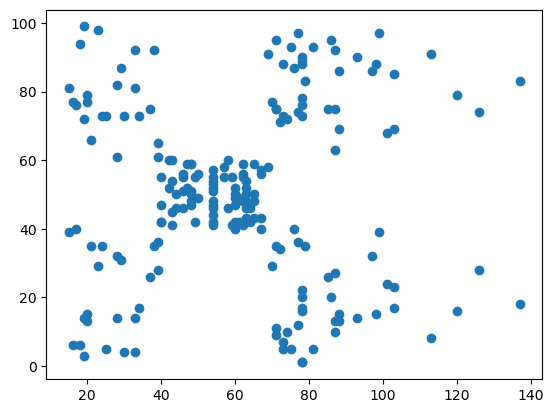

In [43]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

X = data[[ 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features using Normalizer
scaler = Normalizer()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Initialize KMeans model with KMeans++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, max_iter=300)

# Fit the model to the training data
kmeans.fit(X_train)

# Predict cluster labels for the test data
y_pred = kmeans.predict(X_test)

# Evaluate clustering quality using silhouette score
silhouette = silhouette_score(X_test, y_pred)

print("Silhouette Score:", silhouette)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.7022027545720363


In [56]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

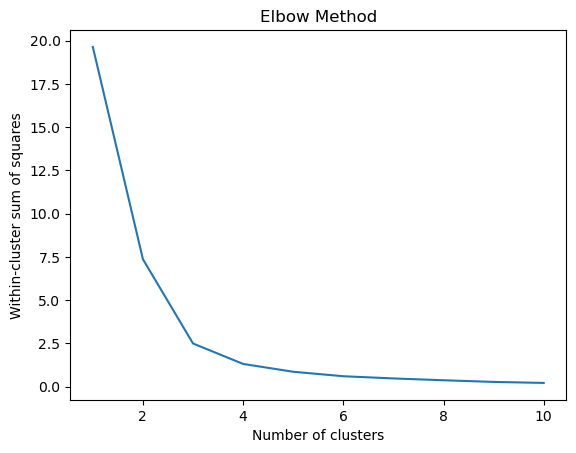

In [45]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=300)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [46]:
kmeans = KMeans(n_clusters = 5, random_state=42)

In [47]:
kmeans.fit_predict(data[[ 'Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [58]:
k_range = range(1, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [59]:
sse

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25036.417604033984,
 21916.794789843727,
 20072.070939404006]

In [48]:
kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [49]:
data[' Cluster'] = kmeans.labels_
data.head()

,CustomerID,Male,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


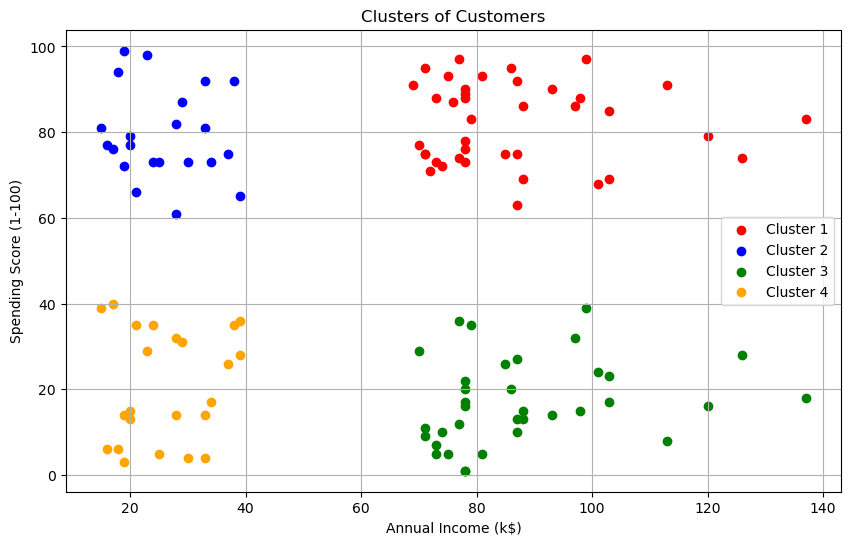

In [52]:
d1 = data[data[' Cluster'] == 1]
d2 = data[data[' Cluster'] == 2]
d3 = data[data[' Cluster'] == 3]
d4 = data[data[' Cluster'] == 4]

plt.figure(figsize=(10, 6))

plt.scatter(d1['Annual Income (k$)'], d1['Spending Score (1-100)'], color='red', label='Cluster 1')
plt.scatter(d2['Annual Income (k$)'], d2['Spending Score (1-100)'], color='blue', label='Cluster 2')
plt.scatter(d3['Annual Income (k$)'], d3['Spending Score (1-100)'], color='green', label='Cluster 3')
plt.scatter(d4['Annual Income (k$)'], d4['Spending Score (1-100)'], color='orange', label='Cluster 4')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.grid(True)
plt.show()
